# Bird Strike Analysis: Project Report

## Objective
- Analyze and predict bird strike damage using key variables:
  1. Wildlife Size
  2. Altitude
  3. Flight Phase

## Contents
1. Data preparation and cleaning.
2. Three visualizations highlighting key insights:
   - Total incidents by altitude bin.
   - Proportion of incidents by flight phase.
   - Damage distribution by wildlife size.
3. Machine learning to predict damage occurrence.

---

# 새 충돌 분석: 프로젝트 보고서

## 목적
- 다음 주요 변수들을 활용하여 새 충돌 피해를 분석하고 예측:
  1. 조류 크기(Wildlife Size)
  2. 고도(Altitude)
  3. 비행 단계(Flight Phase)

## 구성
1. 데이터 준비 및 정리.
2. 세 가지 주요 시각화:
   - 고도 구간별 총 사건 수.
   - 비행 단계별 사건 비율.
   - 조류 크기별 피해 분포.
3. 피해 발생 여부를 예측하는 머신러닝 모델.


In [36]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
bird_data = pd.read_csv('BirdStrikes.csv')

# 한글 설명:
# - 필수 라이브러리(pandas, matplotlib, seaborn)를 임포트합니다.
# - Bird Strikes 데이터를 CSV 파일에서 불러옵니다.


## Visualization 1: Total Incidents by Altitude Bin

### Description
- This visualization shows the total number of bird strikes for each altitude bin.
- The `AltitudeBin` field was extracted and grouped to calculate the total number of incidents.

### Implementation
- The data is grouped by `AltitudeBin`, and the total count of incidents is calculated.
- A bar chart is used to visualize the total number of incidents across altitude bins.
---
## 시각화 1: 고도 구간별 총 사건 수

### 설명
- 고도 구간별 새 충돌 사건 수를 시각화.
- `AltitudeBin` 필드를 추출하고 그룹화하여 총 사건 수를 계산.

### 구현
- 데이터를 `AltitudeBin` 기준으로 그룹화하고 사건 수를 계산.
- 막대 그래프를 사용해 고도 구간별 사건 수를 시각화.

---

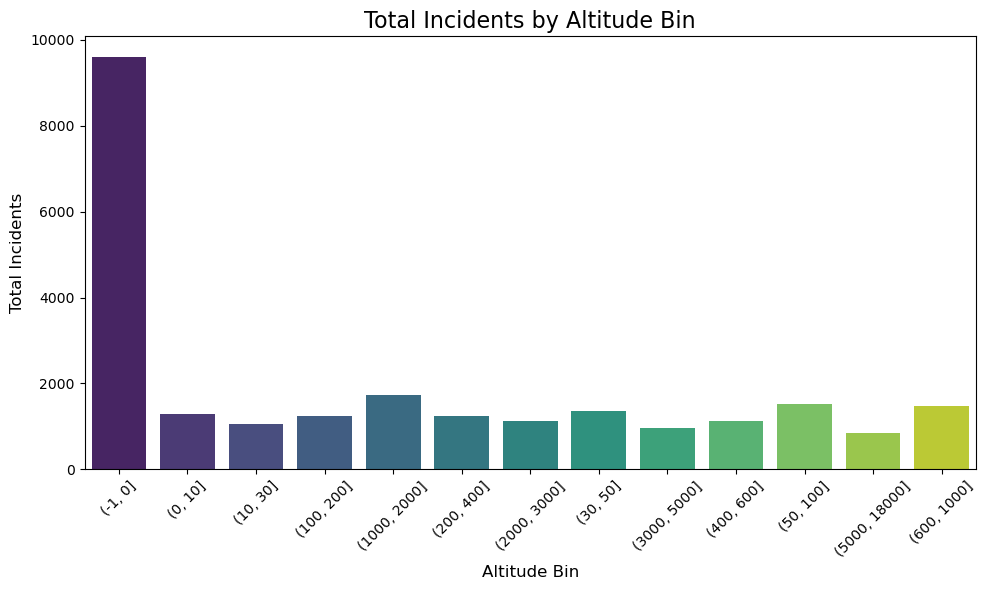

In [37]:
# Ensure 'Cost' is numeric and clean the data
bird_data['Cost'] = pd.to_numeric(bird_data['Cost'], errors='coerce')
bird_data = bird_data.dropna(subset=['Cost'])

# Extract both negative and positive starting numbers from AltitudeBin
bird_data['AltitudeBin_Start'] = bird_data['AltitudeBin'].str.extract(r'(-?\d+)').astype(float)

# Group by AltitudeBin and count total incidents
altitude_damage_stats = bird_data.groupby('AltitudeBin').size().reset_index(name='Incident_Count')

# Visualization with updated Seaborn behavior
plt.figure(figsize=(10, 6))
sns.barplot(
    x='AltitudeBin', 
    y='Incident_Count', 
    data=altitude_damage_stats, 
    hue='AltitudeBin',  # Assign `x` to `hue`
    palette='viridis', 
    legend=False  # Disable legend as it's redundant in this case
)
plt.title('Total Incidents by Altitude Bin', fontsize=16)
plt.xlabel('Altitude Bin', fontsize=12)
plt.ylabel('Total Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Visualization 2: Proportion of Incidents by Flight Phase

### Description
- This visualization shows the proportion of incidents across different flight phases.
- Flight phases with less than 3% of total incidents are grouped into an "Other" category for simplicity.
- The "Other" category includes a detailed breakdown of smaller categories in the chart legend.

### Implementation
1. **Proportion Calculation**:
   - The `FlightPhase` field is analyzed to calculate the percentage of incidents for each category using `value_counts(normalize=True)`.

2. **Grouping Smaller Categories**:
   - Categories with proportions less than or equal to 3% are combined into an "Other" category.
   - The sum of these smaller categories is calculated and added to `flight_phase_stats_filtered` as a new "Other" entry.

3. **Custom Pie Chart**:
   - A pie chart is created to visualize the proportions of flight phases.
   - Percentages for all categories, including "Other," are displayed on the chart.

4. **Legend Addition**:
   - The legend includes detailed information about the components of the "Other" category, listing each smaller flight phase with its percentage.

5. **Visualization Enhancements**:
   - Labels are moved slightly further from the chart for better readability using `labeldistance`.
   - A pastel color palette is applied to improve the visual appeal.

---

### Key Points
- **Threshold**: Flight phases with less than or equal to 3% of total incidents are grouped.
- **Inclusions**: Percentages for all categories, including "Other," are displayed on the pie chart.
- **Legend Details**: The legend provides a breakdown of which flight phases are included in "Other."

---
## 시각화 2: 비행 단계별 사건 비율

### 설명
- 비행 단계별 새 충돌 사건 비율을 시각화합니다.
- 전체 사건 중 3% 이하인 비율을 가진 비행 단계는 "기타(Other)"로 그룹화하여 간소화합니다.
- "기타(Other)" 카테고리는 범례에서 세부적으로 작은 비율의 비행 단계를 나열합니다.

### 구현
1. **비율 계산**:
   - `FlightPhase` 필드를 분석하여 각 비행 단계별 사건 비율을 `value_counts(normalize=True)`로 계산합니다.

2. **작은 카테고리 그룹화**:
   - 사건 비율이 3% 이하인 카테고리를 "기타(Other)"로 그룹화합니다.
   - 이 작은 카테고리들의 합을 계산하여 `flight_phase_stats_filtered`에 추가합니다.

3. **파이 차트 생성**:
   - 각 비행 단계의 비율을 시각화하는 파이 차트를 생성합니다.
   - "기타(Other)"를 포함한 모든 카테고리의 비율을 차트에 표시합니다.

4. **범례 추가**:
   - 범례에는 "기타(Other)" 카테고리에 포함된 비행 단계와 그 비율이 나열됩니다.

5. **시각화 개선**:
   - 라벨은 `labeldistance`를 활용하여 차트로부터 멀리 배치하여 가독성을 높였습니다.
   - 파스텔 색상 팔레트를 적용하여 시각적 매력을 향상시켰습니다.

---

### 주요 포인트
- **기준값**: 사건 비율이 3% 이하인 비행 단계는 그룹화됩니다.
- **포함 항목**: "기타(Other)"를 포함한 모든 카테고리의 비율을 차트에 표시합니다.
- **범례 세부사항**: 범례에는 "기타(Other)"에 포함된 세부 비행 단계를 나열합니다.

---

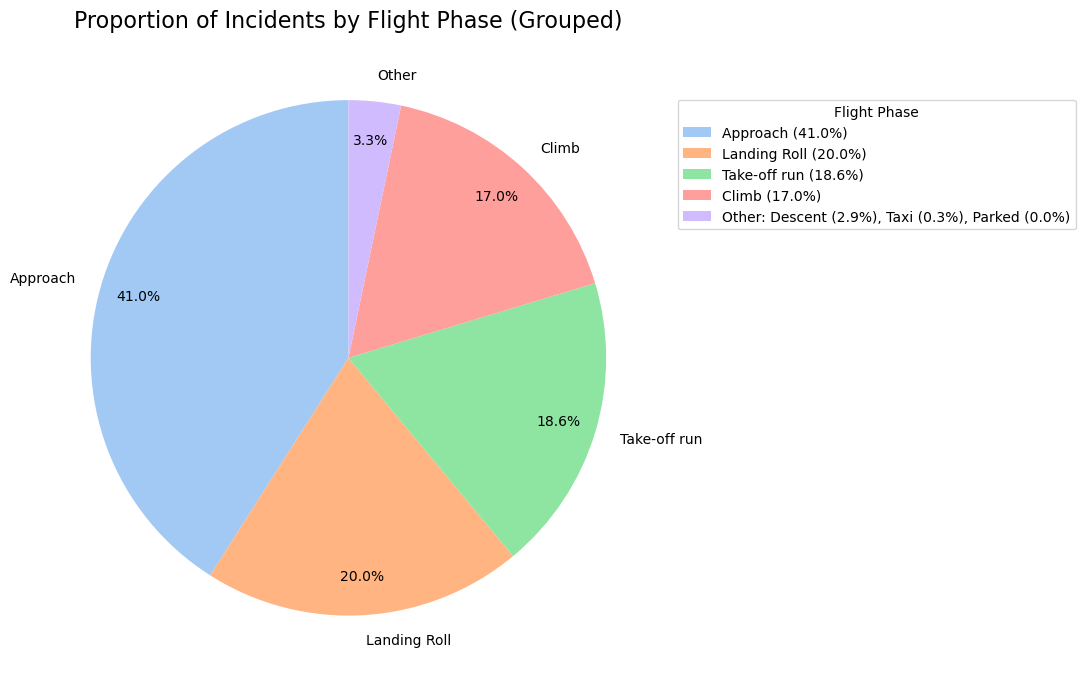

In [ ]:
# Calculate proportions for FlightPhase
flight_phase_stats = bird_data['FlightPhase'].value_counts(normalize=True) * 100

# Combine smaller categories into 'Other' for threshold <= 3%
threshold = 3
flight_phase_stats_filtered = flight_phase_stats[flight_phase_stats > threshold]
other_total = flight_phase_stats[flight_phase_stats <= threshold].sum()
flight_phase_stats_filtered['Other'] = other_total

# Extract details for "Other"
other_components = flight_phase_stats[flight_phase_stats <= threshold]

# Define custom autopct function to display all percentages
def autopct_custom(pct, all_values=flight_phase_stats_filtered.values):
    total = sum(all_values)
    value = pct / 100.0 * total
    return f'{pct:.1f}%'

# Plot the pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    flight_phase_stats_filtered.values,
    labels=flight_phase_stats_filtered.index,
    autopct=lambda pct: autopct_custom(pct, flight_phase_stats_filtered.values),
    startangle=90,
    colors=sns.color_palette('pastel', len(flight_phase_stats_filtered)),
    labeldistance=1.1,  # Move labels further from the chart
    pctdistance=0.85  # Adjust percentage text distance
)

# Add legend with detailed breakdown for 'Other'
other_details = ', '.join([f"{key} ({value:.1f}%)" for key, value in other_components.items()])
plt.legend(
    wedges,
    [f"{label} ({value:.1f}%)" if label != 'Other' else f"Other: {other_details}"
     for label, value in zip(flight_phase_stats_filtered.index, flight_phase_stats_filtered.values)],
    title="Flight Phase",
    loc="center left",
    bbox_to_anchor=(1, 0.8),
    fontsize=10
)

# Title and show
plt.title('Proportion of Incidents by Flight Phase (Grouped)', fontsize=16)
plt.tight_layout()
plt.show()

## Visualization 3: Damage Distribution by Wildlife Size

### Description
- This visualization shows the proportion of bird strikes that resulted in damage or no damage for different wildlife sizes.
- A stacked bar chart is used to show the proportions.

### Implementation
- Proportions are calculated using a pivot table, and a stacked bar chart visualizes these proportions.

---


## 시각화 3: 조류 크기별 피해 분포

### 설명
- 조류 크기에 따라 `피해 없음(No damage)`과 `피해 발생(Cause damage)` 비율을 시각화.
- 스택형 막대 그래프를 사용해 비율을 시각화.

### 구현
- 피벗 테이블을 사용해 비율을 계산하고, 스택형 막대 그래프를 생성.

---


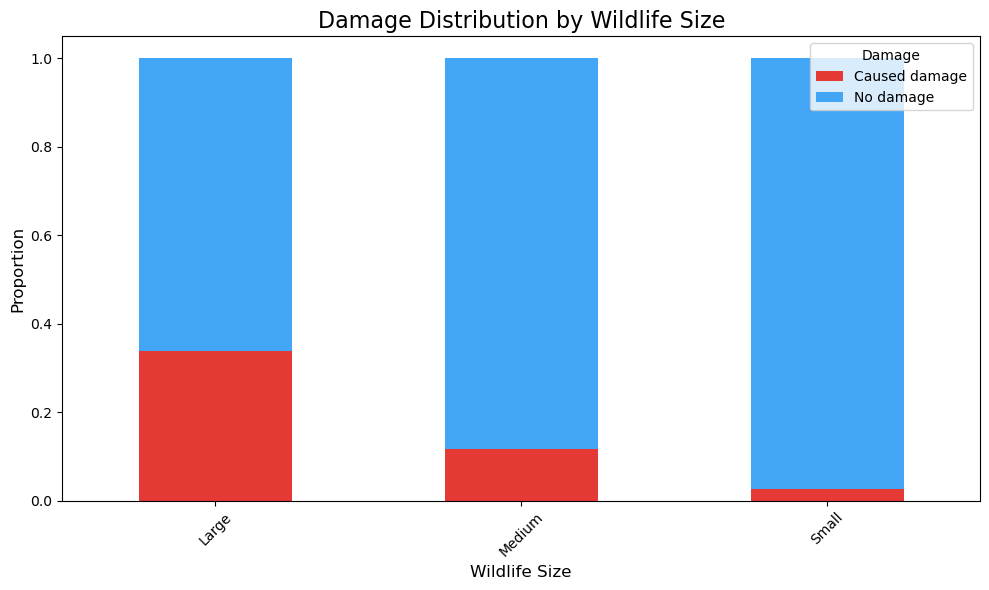

In [39]:

# Group by Wildlife Size and Damage Label
wildlife_damage_stats = bird_data.groupby(['WildlifeSize', 'Damage']).size().reset_index(name='Count')

# Pivot the data for stacked proportions
wildlife_damage_pivot = wildlife_damage_stats.pivot(index='WildlifeSize', columns='Damage', values='Count').fillna(0)
wildlife_damage_proportions = wildlife_damage_pivot.div(wildlife_damage_pivot.sum(axis=1), axis=0)

# Plotting the stacked bar chart
wildlife_damage_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#E53935', '#42A5F5'])
plt.title('Damage Distribution by Wildlife Size', fontsize=16)
plt.xlabel('Wildlife Size', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Damage')
plt.tight_layout()
plt.show()


## Machine Learning: Predicting Damage Occurrence

### Description
- This model predicts whether a bird strike will cause damage based on:
  1. Wildlife Size
  2. Altitude
  3. Flight Phase

### Implementation
- Added a new feature (`FlightPhase_Encoded`) for encoding flight phase data.
- A `RandomForestClassifier` is used to predict damage occurrence.
- The model is evaluated using a confusion matrix and a classification report.
---


## 머신러닝: 피해 발생 여부 예측

### 설명
- 다음 데이터를 기반으로 새 충돌 피해 발생 여부를 예측:
  1. 조류 크기(Wildlife Size)
  2. 고도(Altitude)
  3. 비행 단계(Flight Phase)

### 구현
- 비행 단계 데이터를 인코딩(`FlightPhase_Encoded`)하여 추가.
- `RandomForestClassifier`를 사용해 피해 발생 여부를 예측.
- 혼동 행렬(Confusion Matrix)과 분류 보고서(Classification Report)를 사용해 모델 성능 평가.


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4561
           1       0.49      0.09      0.16       360

    accuracy                           0.93      4921
   macro avg       0.71      0.54      0.56      4921
weighted avg       0.90      0.93      0.90      4921



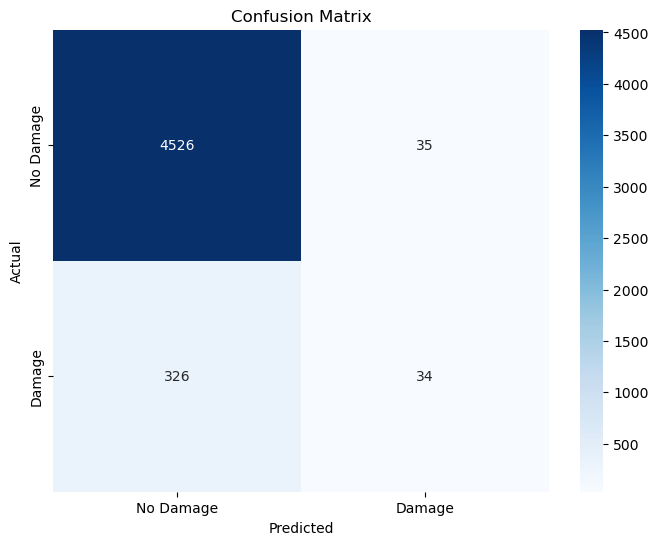

In [40]:
# Encode categorical variables
bird_data['WildlifeSize_Encoded'] = LabelEncoder().fit_transform(bird_data['WildlifeSize'])
bird_data['FlightPhase_Encoded'] = LabelEncoder().fit_transform(bird_data['FlightPhase'])

# Select features and target variable
X = bird_data[['WildlifeSize_Encoded', 'Altitude', 'FlightPhase_Encoded']].fillna(bird_data[['Altitude']].median())
y = bird_data['Damage'].apply(lambda x: 1 if x == 'Caused damage' else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Damage', 'Damage'], 
            yticklabels=['No Damage', 'Damage'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()